# Scenario
 We are the lead data analists at Ubank. The bank consists of 5000 customers and we were tasked with segmenting them into 3
 homogeneous groups, then define these groups.

 Since we know how exactly how many groups we want, we'll apply the KMeans unsupervised machine learning technique.Also, it will
 prove usful because it will allow us to cross examine the groups features with the bank related activity in order to potentialy
 predict new customers behavior while. Let's get to it!

<img src="files/Kmeans_Features.png">

First, let's read in our data set.

In [1]:
ubank = read.csv("ubank.csv")
head(ubank)

ID,Age,Experience,Income,Family,CCAvg,Mortgage,Education,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan
1,25,1,49,4,1.6,0,1,1,0,0,0,0
2,45,19,34,3,1.5,0,1,1,0,0,0,0
3,39,15,11,1,1.0,0,1,0,0,0,0,0
4,35,9,100,1,2.7,0,2,0,0,0,0,0
5,35,8,45,4,1.0,0,2,0,0,0,1,0
6,37,13,29,4,0.4,155,2,0,0,1,0,0


Now we will scale to Z distribution all of our numeric features.

In [2]:
df_z = as.data.frame(scale(ubank[,2:7]))
head(df_z)

Age,Experience,Income,Family,CCAvg,Mortgage
-1.77423939,-1.66591186,-0.5381750,1.3972742,-0.1933512,-0.5554684
-0.02952064,-0.09632058,-0.8640230,0.5259383,-0.2505704,-0.5554684
-0.55293627,-0.44511864,-1.3636566,-1.2167334,-0.5366662,-0.5554684
-0.90188002,-0.96831574,0.5697084,-1.2167334,0.4360596,-0.5554684
-0.90188002,-1.05551525,-0.6250678,1.3972742,-0.5366662,-0.5554684
-0.72740814,-0.61951767,-0.9726390,1.3972742,-0.8799812,0.9684153


We'll set a seed of 1234 to get consistant results and fit our model on to the numeric data. Reminder: k = 3.

In [3]:
set.seed(1234)
clusters = kmeans(df_z, 3)

Now we can assign each field of our data set to it's relevant cluster.

In [4]:
ubank$cluster = as.factor(clusters$cluster)
tail(ubank)

,ID,Age,Experience,Income,Family,CCAvg,Mortgage,Education,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan,cluster
4995,4995,64,40,75,3,2.0,0,3,0,0,1,0,0,3
4996,4996,29,3,40,1,1.9,0,3,0,0,1,0,0,2
4997,4997,30,4,15,4,0.4,85,1,0,0,1,0,0,2
4998,4998,63,39,24,2,0.3,0,3,0,0,0,0,0,3
4999,4999,65,40,49,3,0.5,0,2,0,0,1,0,0,3
5000,5000,28,4,83,3,0.8,0,1,0,0,1,1,0,2


Let's look at the size of our clusters.

In [5]:
table(ubank$cluster)


   1    2    3 
 838 1999 2163 

The number of itarations it took to cluster the data.

In [6]:
clusters$iter

[1] 4

Distance between the smallest cluster to  the largest.

In [7]:
dist(clusters$centers[c(1,3),])

         1
3 3.198408

We should create a DataFrame consisting of the average of all our numeric features for each cluster to get a better "look" at our groups(Clusters).

In [8]:
mean_df = aggregate(cbind(Age,Experience,Income,Family,CCAvg,Mortgage)~cluster, ubank, mean)

In [9]:
mean_df

cluster,Age,Experience,Income,Family,CCAvg,Mortgage
1,43.69212,18.658711,146.44869,1.905728,4.792741,112.81623
2,35.05853,9.806403,60.04502,2.611806,1.372378,45.82991
3,55.47665,30.182154,58.30652,2.387425,1.354538,44.53999


Now we'll make a proportion table of all the nominal and ordinal features. Note: this because our model can't handle non-numeric data.

In [10]:
edu = prop.table(ftable(ubank$Education, ubank$cluster))*100
online = prop.table(ftable(ubank$Online, ubank$cluster))*100
securities_acc = prop.table(ftable(ubank$SecuritiesAccount, ubank$cluster))*100
cda_acc = prop.table(ftable(ubank$CDAccount, ubank$cluster))*100
ccCard = prop.table(ftable(ubank$CreditCard, ubank$cluster))*100
personalLoan = prop.table(ftable(ubank$PersonalLoan, ubank$cluster))*100

Finally, let's plot out our results.

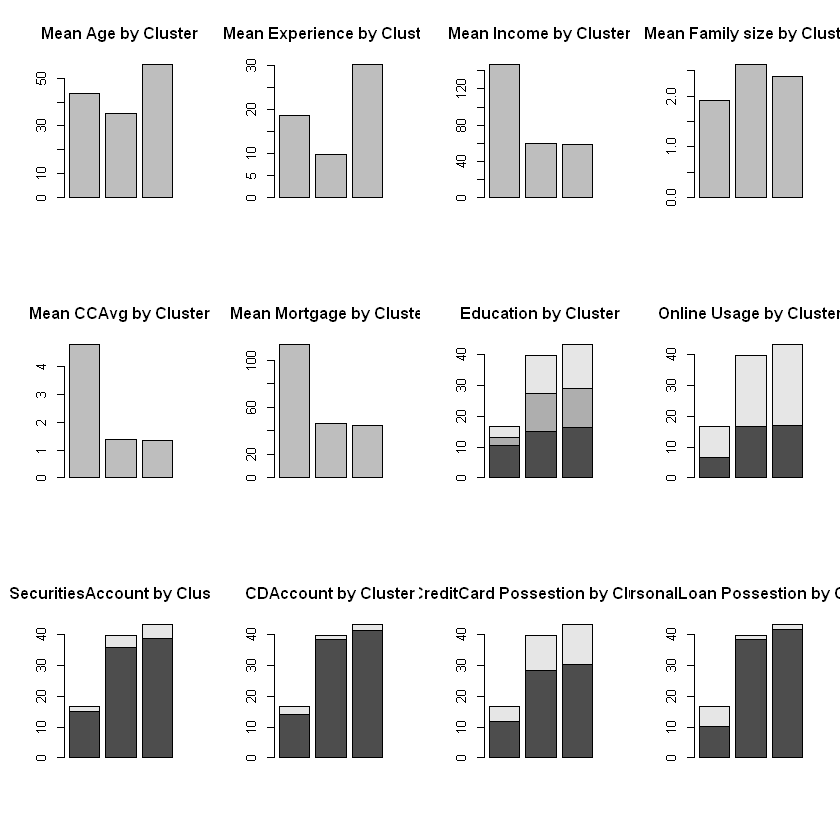

In [11]:
par(mfrow=c(3,4))
barplot(mean_df$Age, main="Mean Age by Cluster")
barplot(mean_df$Experience, main="Mean Experience by Cluster")
barplot(mean_df$Income, main="Mean Income by Cluster")
barplot(mean_df$Family, main="Mean Family size by Cluster")
barplot(mean_df$CCAvg, main="Mean CCAvg by Cluster")
barplot(mean_df$Mortgage, main="Mean Mortgage by Cluster")
barplot(edu, main="Education by Cluster")
barplot(online, main="Online Usage by Cluster")
barplot(securities_acc, main="SecuritiesAccount by Cluster")
barplot(cda_acc, main="CDAccount by Cluster")
barplot(ccCard, main="CreditCard Possestion by Cluster")
barplot(personalLoan, main="PersonalLoan Possestion by Cluster")

 As we can see, there are three types of groups with different characteristics.

 Group I (cluster 0): Older with more experience and education, yet have lower income. Pensioners.
 Group II (cluster 1): Younger with bigger family size and lower income yet seem to be rather educated but less experienced. Young Couples.
 Group III(cluster 2): Average age, high income, small family sizes, High use of bank services, fair amount of experience yet less educated. Heavy spenders, buisness men.

 Seems we have our groups and we know which one of them is the most profitable. Let's take this to upper management! 